In [256]:
import libpysal as lps
import numpy as np
from giddy.directional import rose

In [257]:
f = open(lps.examples.get_path('spi_download.csv'), 'r')
lines = f.readlines()
f.close()

In [258]:
lines = [line.strip().split(",") for line in lines]
names = [line[2] for line in lines[1:-5]]
data = np.array([map(int, line[3:]) for line in lines[1:-5]])


In [259]:
sids  = range(60)
out = ['"United States 3/"',
      '"Alaska 3/"',
      '"District of Columbia"',
      '"Hawaii 3/"',
      '"New England"','"Mideast"',
       '"Great Lakes"',
       '"Plains"',
       '"Southeast"',
       '"Southwest"',
       '"Rocky Mountain"',
       '"Far West 3/"']

In [260]:
out

['"United States 3/"',
 '"Alaska 3/"',
 '"District of Columbia"',
 '"Hawaii 3/"',
 '"New England"',
 '"Mideast"',
 '"Great Lakes"',
 '"Plains"',
 '"Southeast"',
 '"Southwest"',
 '"Rocky Mountain"',
 '"Far West 3/"']

In [261]:
snames = [name for name in names if name not in out]

In [262]:
sids = [names.index(name) for name in snames]

In [263]:
states = data[sids,:]
us = data[0]
years = np.arange(1969, 2009)

In [264]:
sids

[1,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [265]:
us

array([ 3836,  4084,  4340,  4717,  5230,  5708,  6172,  6754,  7402,
        8243,  9138, 10091, 11209, 11901, 12583, 13807, 14637, 15338,
       16137, 17244, 18402, 19354, 19818, 20799, 21385, 22297, 23262,
       24442, 25654, 27258, 28333, 30318, 31149, 31470, 32284, 33899,
       35447, 37728, 39430, 40208])

In [266]:
rel = states/(us*1.)

In [267]:
rel[0]

array([ 0.71272158,  0.72526934,  0.73870968,  0.74750901,  0.75391969,
        0.7596356 ,  0.77219702,  0.78664495,  0.78276142,  0.78418052,
        0.78124316,  0.77544346,  0.77250424,  0.76901101,  0.77660335,
        0.77873542,  0.78595341,  0.78758639,  0.78918015,  0.79094178,
        0.8029562 ,  0.80696497,  0.8243516 ,  0.83003991,  0.83076923,
        0.83670449,  0.84046944,  0.82828737,  0.82318547,  0.81506347,
        0.81039777,  0.7939178 ,  0.80570805,  0.82033683,  0.82867674,
        0.83793032,  0.84320253,  0.83449958,  0.83395891,  0.83983287])

In [268]:
rel[1]

array([ 0.91110532,  0.93756121,  0.95184332,  0.94827221,  0.9376673 ,
        0.92869657,  0.89679196,  0.89739414,  0.89367738,  0.913745  ,
        0.93116656,  0.93984739,  0.94406281,  0.91437694,  0.92426289,
        0.92728326,  0.93161167,  0.93460686,  0.92309599,  0.90367664,
        0.88474079,  0.86834763,  0.87057221,  0.85398336,  0.85906009,
        0.86939947,  0.86682143,  0.86568202,  0.86657052,  0.87027662,
        0.8676455 ,  0.8661851 ,  0.86477897,  0.86406101,  0.8629352 ,
        0.87220862,  0.89042796,  0.88788168,  0.87276186,  0.85393454])

In [269]:
rel.shape

(48, 40)

In [270]:
gal = lps.open(lps.examples.get_path('states48.gal'))
w = gal.read()
w.transform = 'r'

In [271]:
Y = rel[:, [0, -1]]

In [272]:
Y.shape

(48, 2)

In [273]:
Y

array([[ 0.71272158,  0.83983287],
       [ 0.91110532,  0.85393454],
       [ 0.68196038,  0.80573518],
       [ 1.181439  ,  1.08538102],
       [ 0.96115746,  1.06906586],
       [ 1.25677789,  1.39952248],
       [ 1.14859228,  1.00773478],
       [ 0.9535975 ,  0.9765967 ],
       [ 0.82090719,  0.86781238],
       [ 0.85088634,  0.82257262],
       [ 1.12956204,  1.05319837],
       [ 0.9624609 ,  0.86064962],
       [ 0.95542231,  0.93021289],
       [ 0.92674661,  0.96547951],
       [ 0.77267987,  0.79775169],
       [ 0.75234619,  0.90588938],
       [ 0.81803962,  0.90671011],
       [ 1.09462982,  1.20319339],
       [ 1.09098019,  1.27472145],
       [ 1.08107404,  0.86920513],
       [ 0.98409802,  1.07035913],
       [ 0.62643379,  0.75604357],
       [ 0.93039625,  0.9110376 ],
       [ 0.85870699,  0.86161958],
       [ 0.93091762,  0.97368683],
       [ 1.18091762,  1.02422404],
       [ 0.97627737,  1.08493335],
       [ 1.17309698,  1.277308  ],
       [ 0.76120959,

In [274]:
np.random.seed(100)

In [275]:
r4 = rose(Y, w, k=4, permutations=999)

In [276]:
r4.keys()

['random_counts', 'counts', 'pvalues', 'cuts']

In [277]:
r4['cuts']

array([ 0.        ,  1.57079633,  3.14159265,  4.71238898,  6.28318531])

In [278]:
r4['counts']

array([32,  5,  9,  2])

In [279]:
import matplotlib.cm as cm
from matplotlib.pyplot import figure, show, rc
%pylab inline
def circular(u_theta, k=8):
    w = 2 * np.pi / k
    cuts = np.arange(0.0, 2*np.pi+w, w)
    counts, bins = np.histogram(u_theta, cuts)
    theta = np.arange(0.0, 2*np.pi, 2*np.pi/k)
    width = np.pi/ (k/2.)
    fig = figure(figsize=(8, 8))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
    bars = ax.bar(theta, counts, width=width, bottom=0.0)
    for r,bar in zip(counts, bars):
        bar.set_facecolor(cm.jet(r/10.))
        bar.set_alpha(0.5)
    show()

Populating the interactive namespace from numpy and matplotlib


In [280]:
r = Y
rl = lps.weights.spatial_lag.lag_spatial(w, r)

In [281]:
dir(lps)

['IOHandlers',
 'MISSINGVALUE',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'api',
 'cg',
 'common',
 'examples',
 'geotable',
 'io',
 'open',
 'version',
 'weights']

In [282]:
z = (r - r.mean())/ r.std()
zl = lps.weights.spatial_lag.lag_spatial(w, r)

In [283]:
z

array([[-1.59632715, -0.7379034 ],
       [-0.25657742, -0.64267023],
       [-1.80406759, -0.96817618],
       [ 1.56907367,  0.92036295],
       [ 0.08144091,  0.81018137],
       [ 2.07786168,  3.04186222],
       [ 1.34724914,  0.3959927 ],
       [ 0.03038606,  0.18570712],
       [-0.86571462, -0.54894871],
       [-0.66325572, -0.85446744],
       [ 1.21873175,  0.70302307],
       [ 0.09024347, -0.59732111],
       [ 0.04270965, -0.12753776],
       [-0.15094669,  0.11062913],
       [-1.19140936, -1.02209125],
       [-1.32872931, -0.29180237],
       [-0.88508025, -0.2862597 ],
       [ 0.98282313,  1.71598816],
       [ 0.95817596,  2.19904033],
       [ 0.8912765 , -0.53954296],
       [ 0.23636598,  0.81891528],
       [-2.17905667, -1.3037597 ],
       [-0.12629952, -0.25703471],
       [-0.61044036, -0.59077068],
       [-0.12277849,  0.16605584],
       [ 1.56555265,  0.50734999],
       [ 0.18355062,  0.91733968],
       [ 1.51273728,  2.21650814],
       [-1.2688719 ,

In [284]:
z = Y - Y.mean(axis=0)

In [285]:
Y.mean(axis=0)

array([ 0.92881039,  0.96938576])

In [286]:
Y.std(axis=0)

array([ 0.14989073,  0.14339501])

In [287]:
z = (Y - Y.mean(axis=0)) / Y.std(axis=0)

In [288]:
z.std(axis=0)

array([ 1.,  1.])

In [289]:
z.mean(axis=0)

array([ -1.11022302e-16,  -2.03540888e-16])

In [290]:
dx = z[:,1] - z[:,0]

In [291]:
dx

array([ 0.5381737 , -0.68700725,  0.50560939, -0.87649735,  0.47933913,
        0.8116191 , -1.19884454, -0.11508058,  0.0115324 , -0.50396469,
       -0.75483239, -0.98279812, -0.45072364, -0.01347261, -0.15530296,
        0.73447817,  0.30192627,  0.52424565,  1.04741257, -1.71446491,
        0.33530952,  0.52952004, -0.41748509, -0.2838369 ,  0.01593613,
       -1.29951207,  0.489122  ,  0.51760615,  0.15606137, -0.06117019,
        0.26889101,  0.96171108, -1.11808696,  0.10527536, -0.65976859,
       -0.21758751, -0.07938622,  0.19573158,  0.87202409,  0.35985224,
        0.13729238, -0.42342283,  0.26764418,  0.91511031, -0.2350584 ,
        0.06839032, -0.53003088,  1.62852056])

In [292]:
r.mean(axis=0)

array([ 0.92881039,  0.96938576])

In [293]:
lr = lps.weights.spatial_lag.lag_spatial(w, r)

In [294]:
z = (r-r.mean(axis=0)) / r.std(axis=0)

In [295]:
zl = (lr - r.mean(axis=0)) / r.std(axis=0)

In [296]:
dx = z[:,1] - z[:,0]
dy = zl[:,1] - zl[:,0]

In [297]:
theta = np.arctan2(dy, dx)

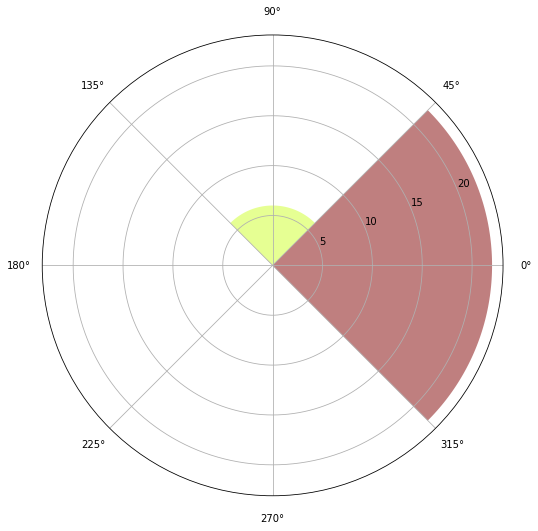

In [298]:
circular(theta, k=4)

In [299]:
theta

array([ 0.35001195, -2.62219335,  0.44558335, -2.35301092,  0.22894083,
        0.35653086,  2.91630037,  1.96731754,  1.52460967, -2.7430971 ,
       -2.54988787, -2.38075408, -2.96626004,  1.85708725, -2.08380761,
        0.48898754,  1.0177662 , -0.203594  ,  0.26617011, -2.66877671,
        0.56644553,  0.790105  , -3.02604016,  1.93724655,  1.52525702,
       -2.69009864,  0.83386863, -0.76058287, -0.46197487,  1.69617128,
        0.94306824,  0.30978282, -2.6488267 ,  0.93021424, -2.30654989,
       -2.37082999,  1.65599557,  0.62161298,  0.3991568 ,  0.6516619 ,
        1.22014595, -3.05264878,  1.07239647,  0.22891014, -1.95472299,
       -0.14983   , -2.25776667,  0.01597172])

In [300]:
dx

array([ 0.5381737 , -0.68700725,  0.50560939, -0.87649735,  0.47933913,
        0.8116191 , -1.19884454, -0.11508058,  0.0115324 , -0.50396469,
       -0.75483239, -0.98279812, -0.45072364, -0.01347261, -0.15530296,
        0.73447817,  0.30192627,  0.52424565,  1.04741257, -1.71446491,
        0.33530952,  0.52952004, -0.41748509, -0.2838369 ,  0.01593613,
       -1.29951207,  0.489122  ,  0.51760615,  0.15606137, -0.06117019,
        0.26889101,  0.96171108, -1.11808696,  0.10527536, -0.65976859,
       -0.21758751, -0.07938622,  0.19573158,  0.87202409,  0.35985224,
        0.13729238, -0.42342283,  0.26764418,  0.91511031, -0.2350584 ,
        0.06839032, -0.53003088,  1.62852056])

In [301]:
dy

array([ 0.19645602, -0.39280635,  0.24148885, -0.88209597,  0.11169867,
        0.30228539,  0.27475477,  0.27485305,  0.24951359, -0.21217971,
       -0.50726814, -0.93567181, -0.07984644,  0.04576638, -0.27569281,
        0.39080727,  0.489122  , -0.10823286,  0.28556577, -0.87697199,
        0.21324516,  0.53452838, -0.04845731,  0.73957276,  0.34970041,
       -0.63013214,  0.53899434, -0.49253408, -0.07770464,  0.4853389 ,
        0.37055663,  0.30783223, -0.60035264,  0.14122409, -0.72875813,
       -0.21130993,  0.92951584,  0.1402117 ,  0.36781946,  0.2745061 ,
        0.37535607, -0.03776049,  0.49178813,  0.21321525, -0.58186664,
       -0.01032429, -0.64617786,  0.02601249])

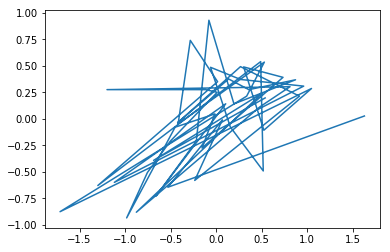

In [302]:
plot(dx, dy)

In [303]:
Y

array([[ 0.71272158,  0.83983287],
       [ 0.91110532,  0.85393454],
       [ 0.68196038,  0.80573518],
       [ 1.181439  ,  1.08538102],
       [ 0.96115746,  1.06906586],
       [ 1.25677789,  1.39952248],
       [ 1.14859228,  1.00773478],
       [ 0.9535975 ,  0.9765967 ],
       [ 0.82090719,  0.86781238],
       [ 0.85088634,  0.82257262],
       [ 1.12956204,  1.05319837],
       [ 0.9624609 ,  0.86064962],
       [ 0.95542231,  0.93021289],
       [ 0.92674661,  0.96547951],
       [ 0.77267987,  0.79775169],
       [ 0.75234619,  0.90588938],
       [ 0.81803962,  0.90671011],
       [ 1.09462982,  1.20319339],
       [ 1.09098019,  1.27472145],
       [ 1.08107404,  0.86920513],
       [ 0.98409802,  1.07035913],
       [ 0.62643379,  0.75604357],
       [ 0.93039625,  0.9110376 ],
       [ 0.85870699,  0.86161958],
       [ 0.93091762,  0.97368683],
       [ 1.18091762,  1.02422404],
       [ 0.97627737,  1.08493335],
       [ 1.17309698,  1.277308  ],
       [ 0.76120959,

In [304]:
YL = lps.weights.spatial_lag.lag_spatial(w, Y)

In [305]:
YL

array([[ 0.79294838,  0.86758232],
       [ 0.97883212,  0.96091325],
       [ 0.79870525,  0.87954719],
       [ 1.01668405,  0.92696313],
       [ 0.87282139,  0.93184015],
       [ 1.09532499,  1.17203044],
       [ 1.08646159,  1.1596034 ],
       [ 0.76681439,  0.85382262],
       [ 0.79332638,  0.87555213],
       [ 0.96784845,  0.97630654],
       [ 0.91955162,  0.8877885 ],
       [ 1.00071689,  0.90400542],
       [ 0.956943  ,  0.98484962],
       [ 0.91442909,  0.96219036],
       [ 0.92410249,  0.9253489 ],
       [ 0.72844977,  0.83374784],
       [ 0.97627737,  1.08493335],
       [ 0.94903545,  0.97321429],
       [ 1.06183525,  1.13759451],
       [ 0.98627042,  0.89860227],
       [ 0.88249479,  0.95565559],
       [ 0.7294708 ,  0.85533352],
       [ 0.87542362,  0.91136403],
       [ 0.84593326,  0.99615126],
       [ 0.91644943,  1.00770576],
       [ 0.94217935,  0.89181755],
       [ 0.93004866,  1.04785946],
       [ 1.11079249,  1.07285449],
       [ 0.87877998,

In [306]:
dx = Y[:,1] - Y[:,0]
dy = YL[:,1] - Y[:,1]

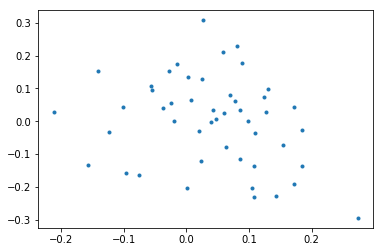

In [307]:
plot(dx, dy, '.')

In [308]:
theta = np.arctan2(dy, dx)

In [309]:
theta

array([  2.14936165e-01,   2.06159358e+00,   5.37724846e-01,
        -2.11587782e+00,  -9.04429814e-01,  -1.01042230e+00,
         2.31859647e+00,  -1.38561314e+00,   1.63534889e-01,
         1.75292885e+00,  -2.00330706e+00,   2.73900669e+00,
         2.00309053e+00,  -8.47154393e-02,   1.37677622e+00,
        -4.39234109e-01,   1.10913083e+00,  -1.12975080e+00,
        -6.41131826e-01,   3.00372139e+00,  -9.25993890e-01,
         6.53705720e-01,   3.12473214e+00,   1.54914985e+00,
         6.71934181e-01,  -2.44000701e+00,  -3.28817593e-01,
        -1.09941471e+00,   8.43904521e-01,  -9.75616253e-01,
         3.75225974e-01,  -1.46410057e-01,  -2.87862042e+00,
         4.02062195e-01,   2.08988891e+00,   1.46978335e+00,
         1.48671102e+00,   6.69782969e-01,   2.53892611e-01,
        -2.38605494e-03,  -9.07271217e-01,   1.65666419e+00,
         1.23015811e+00,  -8.42131657e-01,  -1.56601832e+00,
         1.29904470e+00,   2.30627310e+00,  -8.22759805e-01])

In [310]:
deg = theta * (180./np.pi)

In [311]:
deg

array([  1.23149351e+01,   1.18120611e+02,   3.08093642e+01,
        -1.21230869e+02,  -5.18200112e+01,  -5.78929335e+01,
         1.32845792e+02,  -7.93897850e+01,   9.36985894e+00,
         1.00435425e+02,  -1.14781040e+02,   1.56933523e+02,
         1.14768633e+02,  -4.85383713e+00,   7.88834666e+01,
        -2.51662607e+01,   6.35485156e+01,  -6.47299528e+01,
        -3.67341477e+01,   1.72100558e+02,  -5.30555418e+01,
         3.74545788e+01,   1.79033964e+02,   8.87597483e+01,
         3.84989927e+01,  -1.39802104e+02,  -1.88398603e+01,
        -6.29918230e+01,   4.83521674e+01,  -5.58986937e+01,
         2.14988647e+01,  -8.38867835e+00,  -1.64932801e+02,
         2.30364669e+01,   1.19741814e+02,   8.42123828e+01,
         8.51822665e+01,   3.83757373e+01,   1.45469751e+01,
        -1.36710878e-01,  -5.19828116e+01,   9.49198664e+01,
         7.04828678e+01,  -4.82505898e+01,  -8.97262403e+01,
         7.44297785e+01,   1.32139715e+02,  -4.71406644e+01])

In [312]:
d = np.sqrt((dx*dx + dy *dy))
r = d /d.max()

In [313]:
r

array([ 0.32319006,  0.30131016,  0.3579857 ,  0.46021306,  0.43364737,
        0.66714142,  0.51453809,  0.3102846 ,  0.11809138,  0.38830873,
        0.45256363,  0.2748831 ,  0.14947187,  0.09656155,  0.32302136,
        0.42141377,  0.49448601,  0.63173809,  0.56952251,  0.53133939,
        0.35651294,  0.40557502,  0.04809508,  0.33426457,  0.13575154,
        0.50959407,  0.28518816,  0.57004519,  0.26246922,  0.09035255,
        0.22686231,  0.46131133,  0.31818119,  0.16122023,  0.27689425,
        0.16383273,  0.76848464,  0.24406065,  0.44048649,  0.24597735,
        0.25211704,  0.43354613,  0.6024181 ,  0.6410212 ,  0.50484526,
        0.54685862,  0.13886872,  1.        ])

In [314]:
d

array([ 0.130105  ,  0.12129692,  0.14411251,  0.18526566,  0.17457124,
        0.26856777,  0.20713501,  0.12490971,  0.04753945,  0.15631949,
        0.18218627,  0.11065831,  0.06017214,  0.0388723 ,  0.13003709,
        0.16964642,  0.19906275,  0.25431563,  0.22926982,  0.21389863,
        0.14351962,  0.1632703 ,  0.01936139,  0.13456321,  0.05464881,
        0.20514472,  0.11480677,  0.22948023,  0.10566091,  0.03637277,
        0.09132682,  0.18570778,  0.1280886 ,  0.06490162,  0.11146793,
        0.06595332,  0.309365  ,  0.09825027,  0.17732443,  0.09902187,
        0.10149349,  0.17453049,  0.24251243,  0.25805268,  0.20323302,
        0.22014613,  0.05590368,  0.40256498])

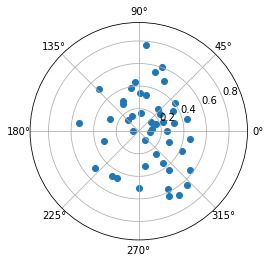

In [315]:
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r)

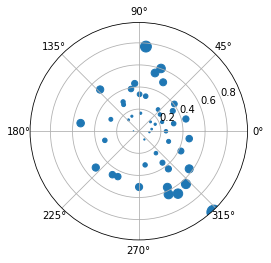

In [316]:
area = 200 * r**2
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, s=area)

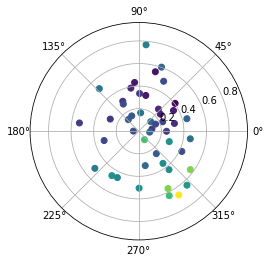

In [317]:
area = 200 * (Y[:,1]/Y[:,1].max())**2
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=Y[:,1])

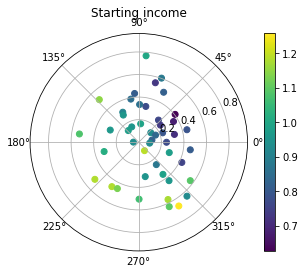

In [318]:
area = 200 * (Y[:,1]/Y[:,1].max())**2
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=Y[:,0])
plt.colorbar(c)
plt.title('Starting income')

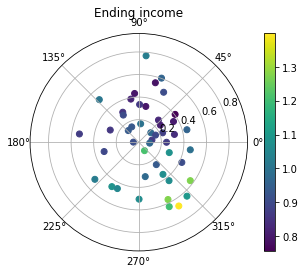

In [319]:
area = 200 * (Y[:,1]/Y[:,1].max())**2
ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=Y[:,1])
plt.colorbar(c)
plt.title('Ending income')